# A map of the Divvy stations in Chicago

**authors:** Peter Carbonetto and Gao Wang<br>
**date:** July 12, 2017

In this analysis, I will use the Divvy trip and station data to generate a map of Chicago.

I begin by loading a few packages, as well as some additional functions I wrote for this project. The `repr` package is used to adjust the dimensions of the figures in the Jupyter notebook.

In [1]:
library(repr)
library(data.table)
library(ggplot2)
source("../code/functions.R")

## Read the data

As [before](first-glance.html), I use function `read.divvy.data` to read the trip and station data from the CSV files.

In [2]:
divvy <- read.divvy.data()

Reading station data from ../data/Divvy_Stations_2016_Q4.csv.
Reading trip data from ../data/Divvy_Trips_2016_Q1.csv.
Reading trip data from ../data/Divvy_Trips_2016_04.csv.
Reading trip data from ../data/Divvy_Trips_2016_05.csv.
Reading trip data from ../data/Divvy_Trips_2016_06.csv.
Reading trip data from ../data/Divvy_Trips_2016_Q3.csv.
Reading trip data from ../data/Divvy_Trips_2016_Q4.csv.
Preparing Divvy data for analysis in R.
Converting dates and times.


## Get total number of departures by station

I use the trip data to get the total number of departures by station. From these data, I create a new "departures" column in the table.

In [3]:
divvy$stations <-
  cbind(divvy$stations,
    data.frame(departures = as.vector(table(divvy$trips$from_station_id))))
summary(divvy$stations$departures)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     557    3060    6190    9030   90000 

## Create a Divvy stations map

A plot of the Divvy stations by geographic location (latitude and longitude) traces the outlines of the City of Chicago and the Lake Michigan shore. Further, the location of the downtown is apparent by scaling the area of each circle by the number of trips.

The University of Chicago Divvy station is highlighted in red.

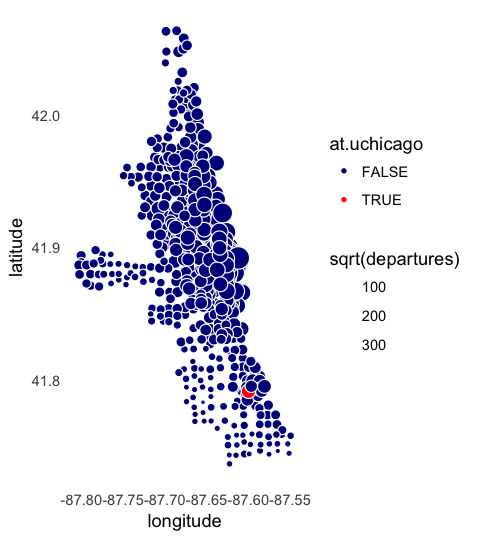

In [4]:
options(repr.plot.width = 4, repr.plot.height = 4.5)
divvy$stations <-
  transform(divvy$stations,
            at.uchicago = (name == "University Ave & 57th St"))
ggplot(divvy$stations,aes(x    = longitude,
                          y    = latitude,
                          fill = at.uchicago,
                          size = sqrt(departures))) +
  geom_point(shape = 21,color = "white") +
  scale_fill_manual(values = c("darkblue","red")) +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

## Session information

This is the version of R and the packages that were used to generate
these results.

In [5]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Sierra 10.12.5

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_2.2.1     data.table_1.10.4 repr_0.12.0      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.11     assertthat_0.2.0 digest_0.6.12    crayon_1.3.2    
 [5] IRdisplay_0.4.4  plyr_1.8.4       grid_3.3.2       R6_2.2.0        
 [9] jsonlite_1.5     gtable_0.2.0     magrittr_1.5     scales_0.4.1    
[13] evaluate_0.10.1  stringi_1.1.2    lazyeval_0.2.0   uuid_0.1-2      
[17] IRkernel_0.7     labeling_0.3     tools_3.3.2      stringr_1.2.0   
[21] munsell_0.4.3    colorspace_1.3-2 pbdZMQ_0.2-5     tibble_1.2      